# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset consists of movies released on or before 2015. The dataset has variables which include `id`, `imdb_id`, `popularity`, `budget`, `revenue`, `original_title`, `cast`, `homepage`, `director`, `tagline`, `overview`, `runtime`, `genres`, `production_companies`, `release_date`, `vote_count`, `vote_average`, `release_year`, `budget_adj`, `revenue_adj`.

1. `id` - A unique identifier for each movie. **Will help to differentiate movies with same names**
2. `imdb_id` - A unique identifier for each movie assigned by IMBD **Has little significance and it will be dropped**
3. `popularity` - A numeric quantity showing how the movie is popular **This will be used to determine populality of the movie**
4. `budget` - the amount used in terms of money to make the movie **will be dropped and adjusted column used**
5. `revenue` - how much was earned from the movie **will be dropped and adjusted column used**
6. `original_title` - the title given to the movie 
7. `cast` - the list of actors in the movie
8. `homepage` - a url of website where one can read about the movie **not significant in analysis will be dropped**
9. `director` - the director of the movie
10. `tagline` - a short descriptive statement about the movie
11. `overview` - A brief description of the movie
12. `runtime` - the running time of the movie in minutes 
13. `genres` - the genre of the movie
14. `production_companies` - which company produced the movie
15. `release_date` - month date and the year the movie was released
16. `vote_count` - the count of votes recieved
17. `vote_average` - average rating the movie received
18. `release_year` - the year the movie was released
19. `budget_adj` - the is the budget adjusted to reflect the inflation
20. `revenue_adj` - the is the revenue adjusted to reflect the inflation

### Question(s) for Analysis

>Question 1: Which genre of movies are most popular across the years?

>Question 2: What genre of movie has highest budget and revenue?

>Question 3: Does popularity of the movie affect the profit?

In [107]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [108]:
# Upgrade pandas to use dataframe.explode() function. 
# %pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [147]:
# Load your data and print out a few lines
df = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


We will investigate the dataset to determine if there are any missing values, duplicate values, and any other issues that need to be addressed before we can proceed with the analysis. We will also drop the columns that are not significant in the analysis.
For these steps, we will be using the following commands:
1. `df.shape` - to get the number of rows and columns in the dataset
2. `df.describe()` - to get the statistical information about the dataset
3. `df.info()` - to get the information about the dataset
4. `df.isnull().sum()` - to get the count of missing values in each column
5. `df.duplicated().sum()` - to get the count of duplicate values in the dataset
6. `df.nunique()` - to get the count of unique values in each column
7. `df.dtypes` - to get the data types of each column

In [148]:
# 1. Check the number of rows and columns in the dataset.
df.shape

(10866, 21)

In [150]:
# 2. Get the statistics of the dataset using the describe() function.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [151]:
# 3. Get general information about the dataset using the info() function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [152]:
# 4. Check for missing values in the dataset using the isnull() function.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [153]:
# 5. Check for duplicates in the dataset using the duplicated() function.
df.duplicated().sum()

1

In [154]:
# 6. Check for unique values in the dataset using the nunique() function.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [155]:
# 7. Check for the type of data in each column using the dtypes attribute.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

After running the above commands `df.info()` and `df.isnull().sum()` we can see that there are missing values in the following columns; `homepage`, `director`, `tagline`, `overview`, `genres`, `production_companies`. We will drop these columns as they are not significant in the analysis. We will also drop the `imdb_id` column as it is not significant in the analysis.
Moreover, we have seen there is a duplicated row in the dataset. We will drop this row as well.


### Data Cleaning
We will be dropping these columns as they are not significant in our analysis. `imdb_id`, `budget`, `revenue`, `homepage`, `tagline`, `overview`, `keywords` and `cast`. As explained in the introduction section, we will be using the adjusted columns for our analysis. The columns `budget_adj` and `revenue_adj` will be used instead of `budget` and `revenue` respectively. The columns `id` and `original_title` will be used to differentiate movies with same names. The `cast` column will be dropped it is not significant in our analysis.

1. Drop the columns which are not significant in analysis. These columns are `imdb_id`, `budget`, `revenue`, `homepage`, `tagline`, `overview`, `keywords`, 

In [156]:
# Drop the columns that are not needed. These columns are imdb_id, homepage, tagline, keywords, overview, budget, revenue, cast.
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget', 'revenue', 'cast'], axis=1, inplace=True)

2. Drop the duplicate rows. We have seen there is a duplicate row in the dataset. We will drop this row.

In [157]:
# Drop the duplicates.
df.drop_duplicates(inplace=True)

# Check if the duplicates are dropped.
df.duplicated().sum()

0

3. Lets see how the dataframe looks after cleaning

In [158]:
# Show the dataframes after dropping the columns and duplicates.
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


1. The `release_date` column is in string format. We will convert it to datetime format. This will help us to work with dates beter. 

In [161]:
# Convert the release_date column to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


5. We will create a new column `profit` which will be the difference between `revenue_adj` and `budget_adj`

In [168]:
# Create a new column profit which is the difference between revenue and budget.
df['profit'] = df['revenue_adj'] - df['budget_adj']

6. We will create a new column with month name from `release_date` column. This will help us to analyse the data based on month and determine the most popular month for movies and if movies released in a particular month are more profitable.

In [169]:
# Create a new column release_month which is the month of the release date from the release_date column.
df['release_month'] = df['release_date'].dt.month_name()
# Let's see the dataframe after adding the new columns.
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,2.101614e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,1.718723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,1.210949e+09


7. The `genres` column has multiple genres for a movie. We will split the genres and create a new dataframe with each genre as a row. This will help us to analyse the data based on genre and determine the most popular genre for movies and if movies of a particular genre are more profitable.

In [170]:
# Split the genres column into rows and create a new dataframe.
df_genres = df.copy()
df_genres = df_genres.assign(genres=df_genres['genres'].str.split('|')).explode('genres')
df_genres.head()

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1.254446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,2.101614e+08


Our dataframe is now ready for analysis. We have cleaned the data and removed the columns and rows that are not significant in our analysis. We have also created new columns that will help us to analyse the data better.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 What genre of movies are most popular across the years?

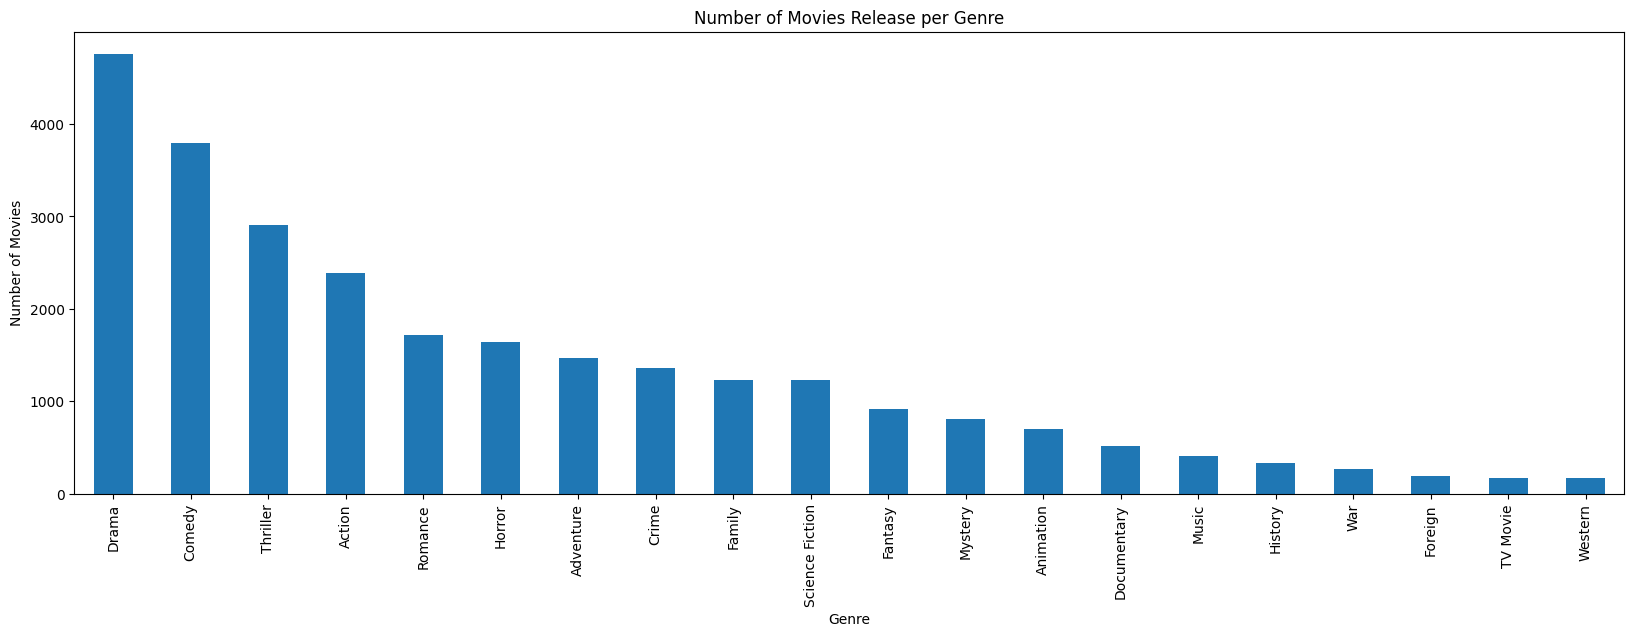

In [125]:
# Create a bar chart to show the number of movies release per genre.
df_genres['genres'].value_counts().plot(kind='bar', figsize=(20, 6))
plt.title('Number of Movies Release per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

**Observation**: The most popular genre of movies is Drama while Western is the least popular genre of movies.

### Research Question 2  Genre of movie with highest budget and revenue?

/var/folders/_l/ydpvhml56w36510518gj11mh0000gn/T/ipykernel_6861/3275304777.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genres.groupby('genres')['budget_adj', 'revenue_adj'].sum().sort_values(ascending=False, by="revenue_adj").plot(kind='bar', figsize=(20, 6))


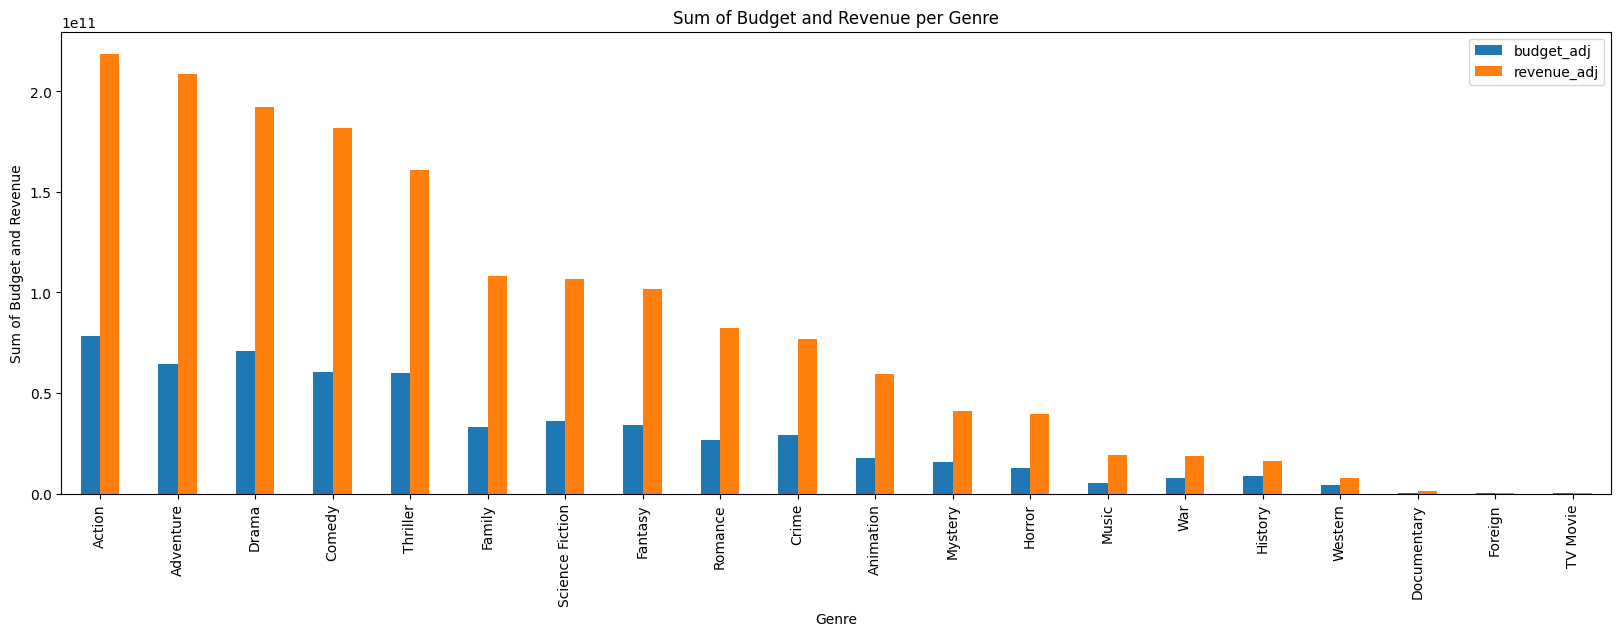

In [126]:
# Group by the genres and plot the sum of budget_adj and revenue_adj.
df_genres.groupby('genres')['budget_adj', 'revenue_adj'].sum().sort_values(ascending=False, by="revenue_adj").plot(kind='bar', figsize=(20, 6))
plt.title('Sum of Budget and Revenue per Genre')
plt.xlabel('Genre')
plt.ylabel('Sum of Budget and Revenue')
plt.show()

When we group the data by `genres` and plot the sum of `budget_adj` and `revenue_adj` we can see that the genre of movie with highest budget is Action followed closely by Drama while the genre of movie with highest revenue is Action. Based on these observations, we can see how the budget and revenue are related to the genre of the movie.

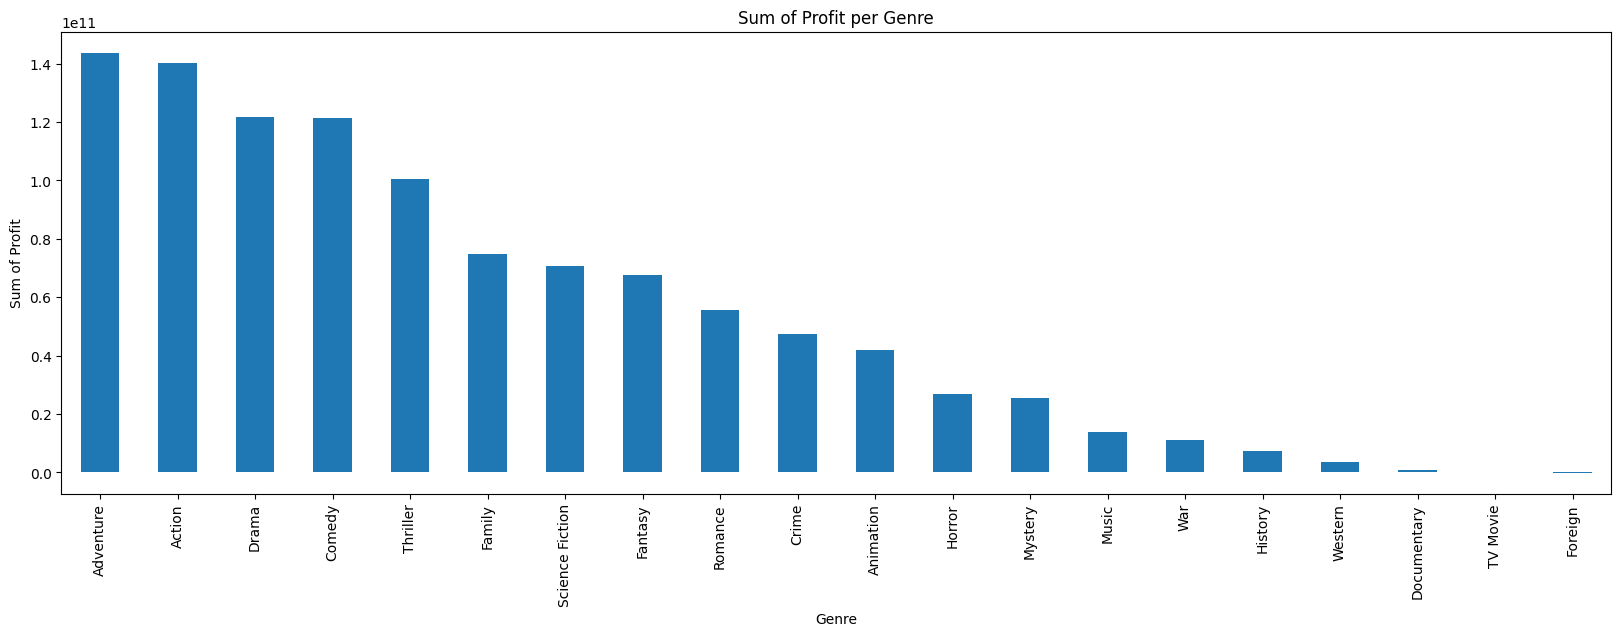

In [171]:
# Group by the genres and plot the profit.
df_genres.groupby('genres')['profit'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20, 6))
plt.title('Sum of Profit per Genre')
plt.xlabel('Genre')
plt.ylabel('Sum of Profit')
plt.show()

From the above plot, we can see movies of genre Adventure and Action are the most profitable. The least profitable genre of movies is Foreign.

### Research Question 3  Does the month of release affect the revenue?

/var/folders/_l/ydpvhml56w36510518gj11mh0000gn/T/ipykernel_6861/3767531169.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('release_month')['budget_adj', 'revenue_adj'].sum().sort_values(ascending=False, by="revenue_adj").plot(kind='bar', figsize=(20, 6))


Text(0, 0.5, 'Sum of Budget and Revenue')

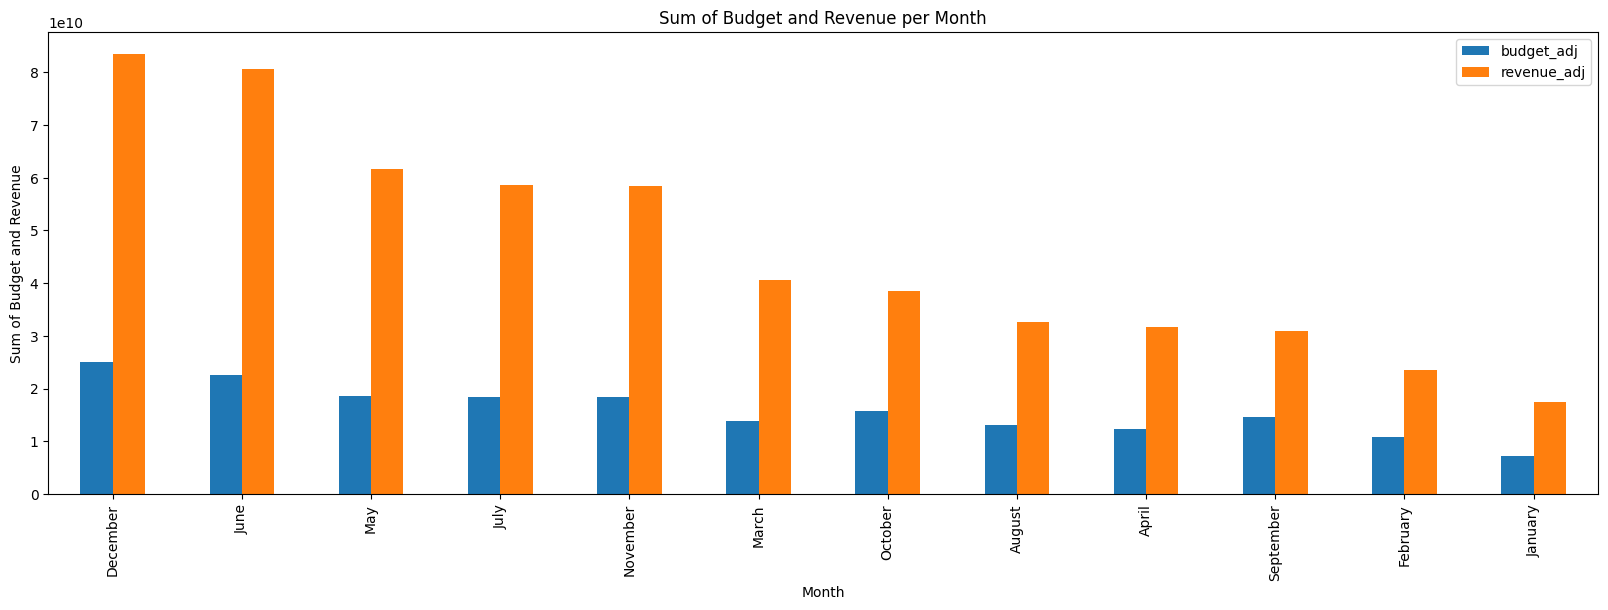

In [172]:
# Group by month and plot the sum of budget_adj and revenue_adj.
df.groupby('release_month')['budget_adj', 'revenue_adj'].sum().sort_values(ascending=False, by="revenue_adj").plot(kind='bar', figsize=(20, 6))
plt.title('Sum of Budget and Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Budget and Revenue')

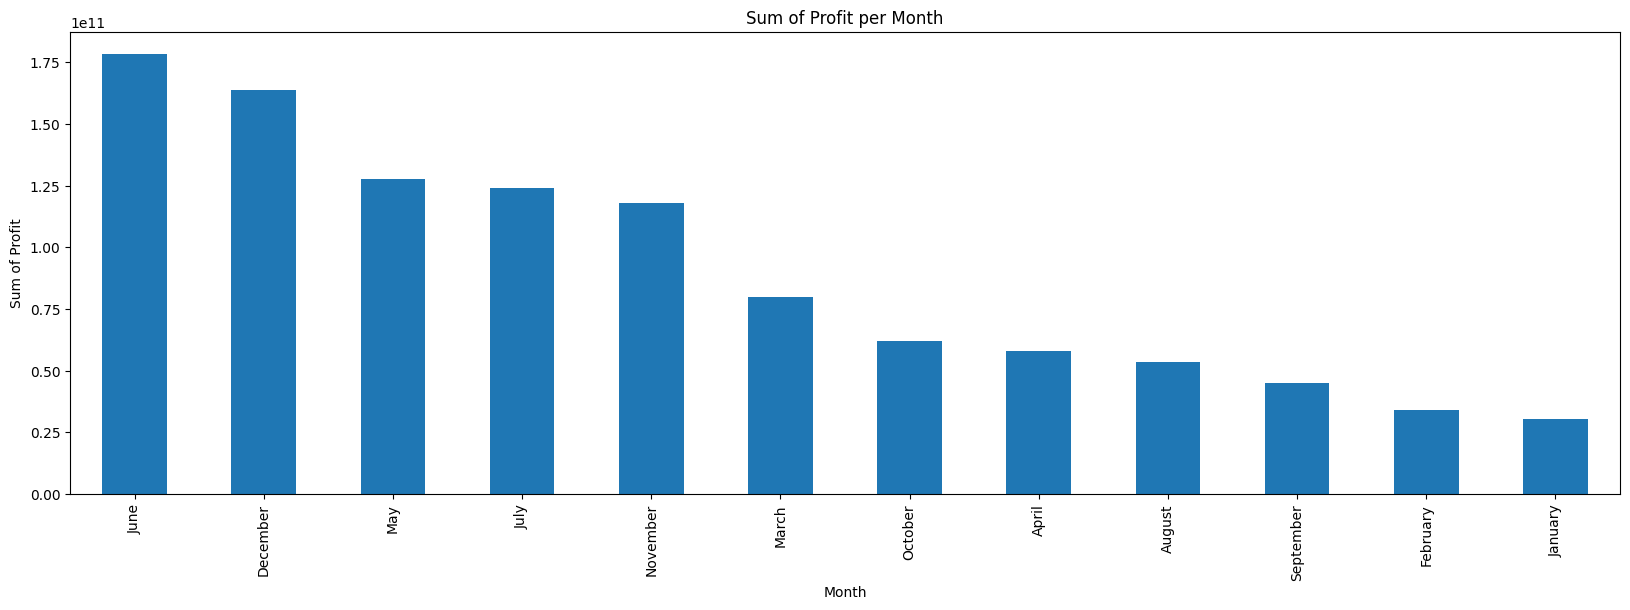

In [75]:
# Sort the release_month column, group by release_month and plot the profit.
df.groupby('release_month')['profit'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20, 6))
plt.title('Sum of Profit per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Profit')
plt.show()


From the above plot, we can see month of release can affect the revenue. Movies released in the month of June are the most profitable. The least profitable month of release is January.

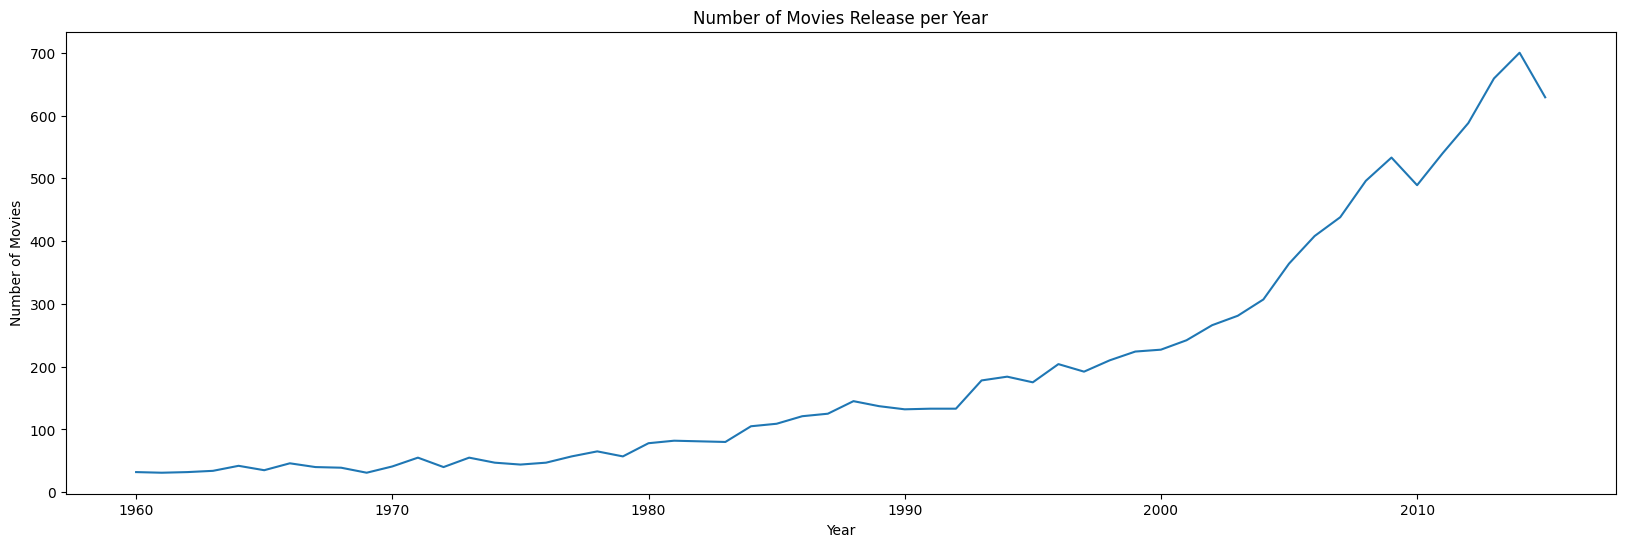

In [146]:
# Plot a line chart to show the number of movies release per year.
df.groupby('release_year')['id'].count().plot(kind='line', figsize=(20, 6))
plt.title('Number of Movies Release per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

The graph shows that as the years progressed, the number of movies released increased. The number of movies released in 2015 is the highest while the number of movies released in 1960 is the lowest.

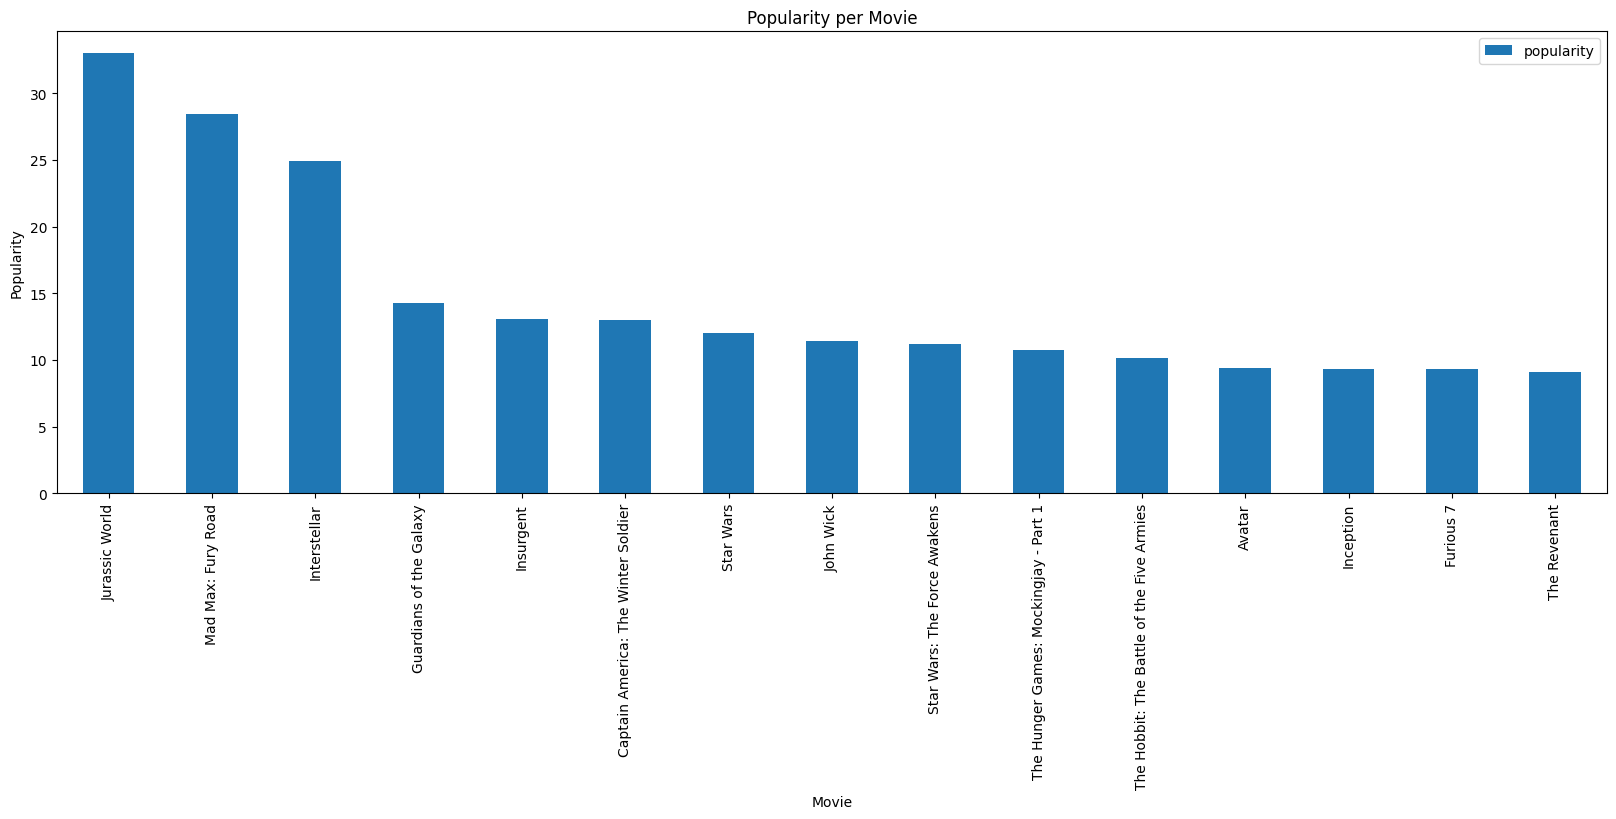

In [131]:
# Plot the popularity and original_title limited to the top 10.
df.sort_values(by='popularity', ascending=False).head(15).plot(x='original_title', y='popularity', kind='bar', figsize=(20, 6))
plt.title('Popularity per Movie')
plt.xlabel('Movie')
plt.ylabel('Popularity')
plt.show()


Lets divide the popularity of the movies into 5 categories; `Low`, `Medium`, `High`, `Very High` and `Extremely High`. We will use the following ranges to determine the popularity of the movie. 

In [190]:
# Cut popularity into 5 bins and create a new column popularity_level.
df['popularity_level'] = pd.cut(df['popularity'], 5, labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])
df[df.popularity_level == 'Extremely High'].head(10)

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit,popularity_level
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1.254446e+09,Extremely High
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,2.101614e+08,Extremely High


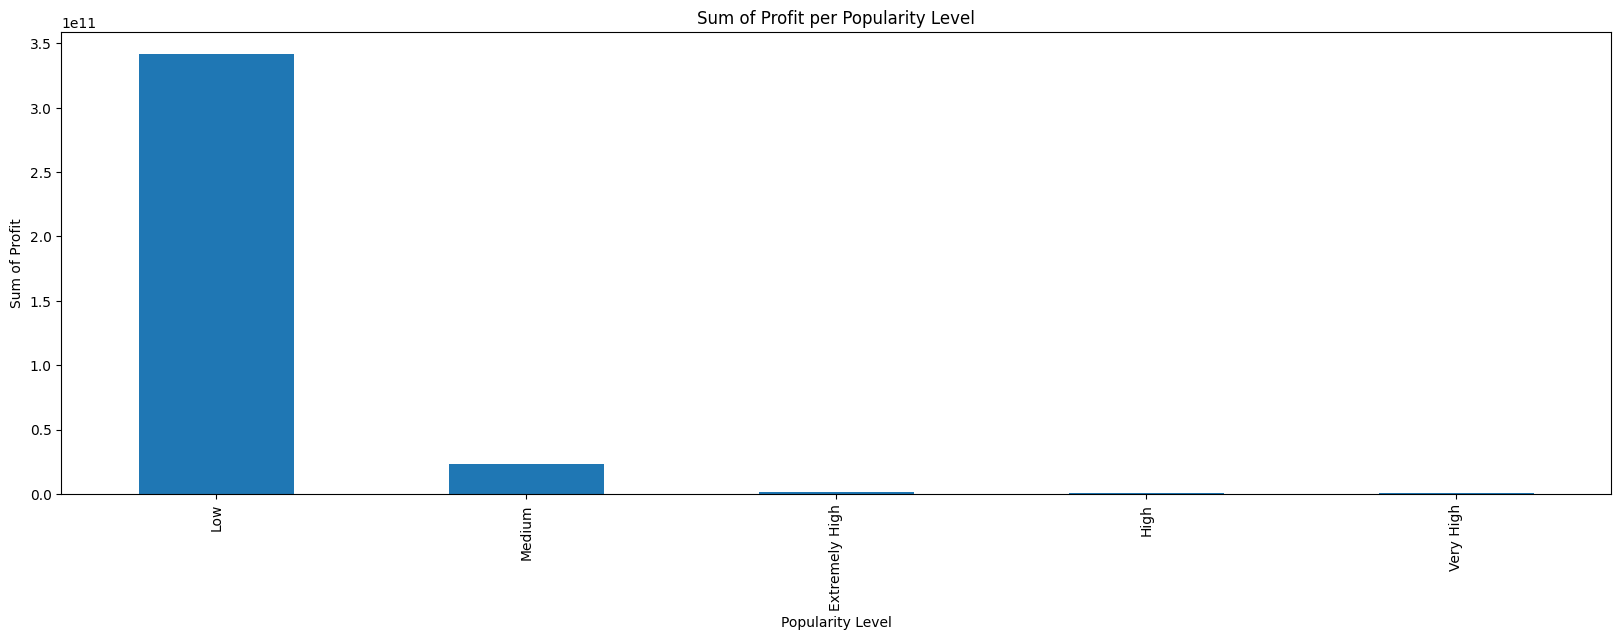

In [191]:
# Group by popularity_level and plot the sum profit.
df.groupby('popularity_level')['profit'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20, 6))
plt.title('Sum of Profit per Popularity Level')
plt.xlabel('Popularity Level')
plt.ylabel('Sum of Profit')
plt.show()

It can be seen that the popularity of the movies does not mean there will be a high profit. Movies with low popularity, when combined together, have the highest profit.

<a id='conclusions'></a>
## Conclusions

After analysing the data, we can conclude the following:
The success of a movie can be determined by the genre of the movie. Movies of genre Adventure and Action are the most profitable. We have also seen that certain months of release can affect the revenue. Movies released in the month of June are the most profitable. The least profitable month of release is January. We have also seen that the popularity of the movies does not mean there will be a high profit. Movies with low popularity, when combined together, have the highest profit.

For a movie to be successful, it should also have a good budget, should be released in the month of June and should be of genre Adventure or Action.

## Additional Analysis
A researcher should try to see if there is any relation between the cast of the movie and the profit of the movie. The researcher should also try to see if there is any relation between the director of the movie and the profit of the movie. Finally, one should see if a movie release by certain production company is more profitable than the other.
`df[(df.budget_adj == 0) & (df.revenue_adj > 0)]`
## Limitations
The data provided is not complete. There are missing values in the data. The data is also not consistent. For example, the `budget_adj` and `revenue_adj` columns have 0 values. There is even rows where `budget_adj` is 0 and `revenue_adj` is in millions. **See code below** This is should not be possible. The `budget` and `revenue` columns should have been NaN. The `production_companies` column has multiple production companies for a movie while some are null making it hard to perform analysis

In [209]:
df[(df.budget_adj == 0) & (df.revenue_adj > 0)]

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit,popularity_level
30,280996,3.927333,Mr. Holmes,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07,June,2.700677e+07,Low
36,339527,3.358321,Solace,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07,September,2.056620e+07,Low
72,284289,2.272044,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04,April,4.222338e+04,Low
88,301875,1.959765,Equals,Drake Doremus,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,2015-09-04,135,5.6,2015,0.0,1.839999e+06,September,1.839999e+06,Low
95,258509,1.841779,Alvin and the Chipmunks: The Road Chip,Walt Becker,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,2015-12-17,278,5.7,2015,0.0,2.150550e+08,December,2.150550e+08,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10766,23916,0.591799,Paradise Alley,Sylvester Stallone,107,Action|Adventure|Drama,Image Ten,1978-09-22,12,6.0,1978,0.0,2.401904e+07,September,2.401904e+07,Low
10787,14822,0.282763,Return From Witch Mountain,John Hough,95,Adventure|Fantasy|Science Fiction|Family,NaN,1978-03-10,22,5.8,1978,0.0,5.479689e+07,March,5.479689e+07,Low
10812,31948,0.318883,Gray Lady Down,David Greene,111,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,1978-03-10,10,6.1,1978,0.0,1.818071e+07,March,1.818071e+07,Low
10817,13963,0.064029,The Last Waltz,Martin Scorsese,117,Documentary|Music,FM Productions|Last Waltz Inc.,1978-05-01,33,8.0,1978,0.0,1.076189e+06,May,1.076189e+06,Low


## Submitting your Project 

In [211]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb' , '--to', 'html'])

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1130097 bytes to Investigate_a_Dataset.html


0